In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Đọc dữ liệu
url = 'https://raw.githubusercontent.com/trongnguyen10102004/Telco-Customer-Churn-Prediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Xử lý cột TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'].fillna(0, inplace = True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [4]:
df.drop(['customerID'], inplace = True, axis = 1)

In [5]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:
        print(f"{col}' : {unique_values}")

gender' : ['Female' 'Male']
SeniorCitizen' : [0 1]
Partner' : ['Yes' 'No']
Dependents' : ['No' 'Yes']
PhoneService' : ['No' 'Yes']
MultipleLines' : ['No phone service' 'No' 'Yes']
InternetService' : ['DSL' 'Fiber optic' 'No']
OnlineSecurity' : ['No' 'Yes' 'No internet service']
OnlineBackup' : ['Yes' 'No' 'No internet service']
DeviceProtection' : ['No' 'Yes' 'No internet service']
TechSupport' : ['No' 'Yes' 'No internet service']
StreamingTV' : ['No' 'Yes' 'No internet service']
StreamingMovies' : ['No' 'Yes' 'No internet service']
Contract' : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling' : ['Yes' 'No']
PaymentMethod' : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn' : ['No' 'Yes']


In [6]:
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 0, 'Yes': 1})
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
df = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'])

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,Male,0,No,No,34,Yes,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,Male,0,No,No,2,Yes,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,Male,0,No,No,45,No,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,Female,0,No,No,2,Yes,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [8]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 5:
        print(f"{col}' : {unique_values}")

gender' : ['Female' 'Male']
SeniorCitizen' : [0 1]
Partner' : ['Yes' 'No']
Dependents' : ['No' 'Yes']
PhoneService' : ['No' 'Yes']
MultipleLines' : [0 1]
OnlineSecurity' : [0 1]
OnlineBackup' : [1 0]
DeviceProtection' : [0 1]
TechSupport' : [0 1]
StreamingTV' : [0 1]
StreamingMovies' : [0 1]
PaperlessBilling' : ['Yes' 'No']
Churn' : ['No' 'Yes']
InternetService_DSL' : [ True False]
InternetService_Fiber optic' : [False  True]
InternetService_No' : [False  True]
Contract_Month-to-month' : [ True False]
Contract_One year' : [False  True]
Contract_Two year' : [False  True]
PaymentMethod_Bank transfer (automatic)' : [False  True]
PaymentMethod_Credit card (automatic)' : [False  True]
PaymentMethod_Electronic check' : [ True False]
PaymentMethod_Mailed check' : [False  True]


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [12]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 5:
        print(f"{col}' : {unique_values}")

gender' : [0 1]
SeniorCitizen' : [0 1]
Partner' : [1 0]
Dependents' : [0 1]
PhoneService' : [0 1]
MultipleLines' : [0 1]
OnlineSecurity' : [0 1]
OnlineBackup' : [1 0]
DeviceProtection' : [0 1]
TechSupport' : [0 1]
StreamingTV' : [0 1]
StreamingMovies' : [0 1]
PaperlessBilling' : [1 0]
Churn' : [0 1]
InternetService_DSL' : [1 0]
InternetService_Fiber optic' : [0 1]
InternetService_No' : [0 1]
Contract_Month-to-month' : [1 0]
Contract_One year' : [0 1]
Contract_Two year' : [0 1]
PaymentMethod_Bank transfer (automatic)' : [0 1]
PaymentMethod_Credit card (automatic)' : [0 1]
PaymentMethod_Electronic check' : [1 0]
PaymentMethod_Mailed check' : [0 1]


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [14]:
target_col = 'Churn'
cols = df.columns.tolist()
cols.remove(target_col)

In [15]:
len(cols)

26

In [16]:
scaler = MinMaxScaler()

In [17]:
x = scaler.fit_transform(df[cols])

In [18]:
x

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [19]:
y = df[target_col]
x.shape, y.shape

((7043, 26), (7043,))

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
roc_auc_score, roc_curve, confusion_matrix, classification_report

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [22]:
# Định nghĩa một neural network với Batch Normalization
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(26, 64) # 23: dữ liệu dùng để huấn luyện có 23 cột
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 2) # Đầu ra 2 cho dự đoán xác suất (có hoặc không)

    def forward(self, x): # Hàm định nghĩa quá trình truyền dữ liệu qua các lớp
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

In [23]:
torch.manual_seed(42)

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
# Split the data into training + validation set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [26]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

In [27]:
# Khởi tạo mô hình neural network và chuyển lên thiết bị
model = Model().to(device)

# Định nghĩa hàm mất mát CrossEntropyLoss và bộ tối ưu hóa Adam
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
# Huấn luyện mô hình
epochs = 100
losses = []
for epoch in range(epochs):
    # Chuyển mô hình sang chế độ huấn luyện
    model.train()  

    # Xóa bộ nhớ cũ
    optimizer.zero_grad()  

    # Dự đoán
    outputs = model.forward(X_train_tensor)  

    # Tính độ mất mát so với kết quả thực
    loss = loss_function(outputs, y_train_tensor) 
    
    # Lưu lại độ mất mát
    losses.append(loss.detach().cpu().numpy())  
    
    loss.backward()  # Tính gradient
    optimizer.step()  # Cập nhật trọng số

    # In kết quả mỗi 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  

Epoch [10/100], Loss: 0.5563
Epoch [20/100], Loss: 0.4860
Epoch [30/100], Loss: 0.4493
Epoch [40/100], Loss: 0.4278
Epoch [50/100], Loss: 0.4152
Epoch [60/100], Loss: 0.4066
Epoch [70/100], Loss: 0.3998
Epoch [80/100], Loss: 0.3941
Epoch [90/100], Loss: 0.3889
Epoch [100/100], Loss: 0.3840


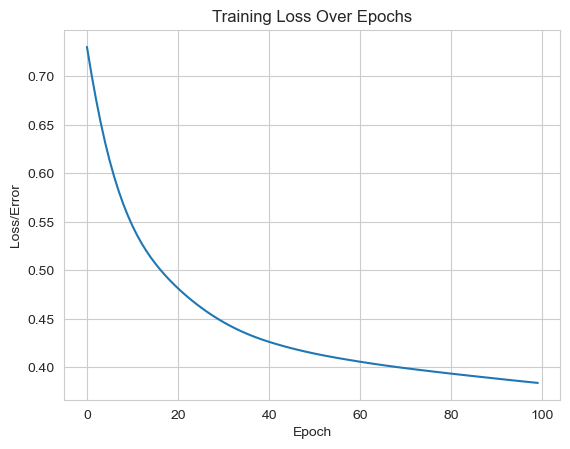

In [29]:
# Vẽ đồ thị độ mất mát qua các epochs
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.title('Training Loss Over Epochs')
plt.show()

In [30]:
# Đánh giá mô hình trên tập dữ liệu kiểm tra (validate model on test set)
model.eval()
with torch.no_grad(): # Về cơ bản tắt back propagation (tắt gradient descent)

    # Dự đoán trên tập kiểm tra
    y_eval = model.forward(X_test_tensor) # X_test_tensor là các đặc trưng từ tập kiểm tra, y_eval sẽ là các dự đoán

    # Tính độ mất mát trên tập kiểm tra
    loss = loss_function(y_eval, y_test_tensor)
    
print(f'Test Loss: {loss.item():.4f}')

Test Loss: 0.4036


In [31]:
correct = 0
# Chuyển mô hình sang chế độ đánh giá
model.eval()
with torch.no_grad():
    for i in range(X_test_tensor.size(0)):
        y_val = model.forward(X_test_tensor[i].unsqueeze(0))  # Thêm unsqueeze(0) để thêm chiều cho dữ liệu
        if y_val.argmax().item() == y_test_tensor[i]:
            correct += 1
print(f'We got {correct}/{y_test.shape[0]}', '(',round((correct / y_test.shape[0] * 100), 2) , '% )', 'correct!')

We got 1146/1409 ( 81.33 % ) correct!


In [32]:
# Chuyển mô hình sang chế độ đánh giá
model.eval()

# Dự đoán trên tập huấn luyện và tập kiểm tra bằng mô hình Neural Network
with torch.no_grad():
    train_preds_nn = model(X_train_tensor.to(device)).cpu().numpy()
    test_preds_nn = model(X_test_tensor.to(device)).cpu().numpy()

# Kết hợp đặc trưng gốc và dự đoán của mô hình Neural Network để tạo đặc trưng mới cho các mô hình
X_train_combined = np.hstack((X_train, train_preds_nn))
X_test_combined = np.hstack((X_test, test_preds_nn))

# Huấn luyện và dự đoán với Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train_combined, y_train.values)
print(f'Random Forest Training Accuracy: {rf_model.score(X_train_combined, y_train.values):.4f}')

# Huấn luyện và dự đoán với SVM
svm_model = SVC(kernel = 'sigmoid', probability = True, random_state=42)
svm_model.fit(X_train_combined, y_train.values)
print(f'SVM Training Accuracy: {svm_model.score(X_train_combined, y_train.values):.4f}')

# Huấn luyện và dự đoán với K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_combined, y_train.values)
print(f'K-Nearest Neighbors Training Accuracy: {knn_model.score(X_train_combined, y_train.values):.4f}')

Random Forest Training Accuracy: 0.9986
SVM Training Accuracy: 0.7492
K-Nearest Neighbors Training Accuracy: 0.8397


In [33]:
# Hàm tính toán các chỉ số đánh giá
def churn_prediction(algo, train_x, train_y, test_x, test_y, cols, cf = 'coefficients'):
    algo.fit(train_x, train_y)
    predictions = algo.predict(test_x) # Dự đoán nhãn lớp cho tập kiểm tra test_x
    probabilities = algo.predict_proba(test_x)[:, 1] # Dự đoán xác suất cho lớp dương (rời bỏ) trên tập kiểm tra

    # Kiểm tra xem mô hình có thuộc tính 'coef_' hoặc 'feature_importances_' không
    if hasattr(algo, 'coef_') and cf == 'coefficients':
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif hasattr(algo, 'feature_importances_') and cf == 'features':
        coefficients = pd.DataFrame(algo.feature_importances_)
    else:
        coefficients = pd.DataFrame([0] * len(cols))  # Tạo một DataFrame giả nếu không có 'coef_' hoặc 'feature_importances_'

    columns_df = pd.DataFrame(cols)
    coef_sum = pd.merge(coefficients, columns_df, left_index = True, right_index = True, how = 'left')
    coef_sum.columns = ["coefficients", "features"]
    coef_sum = coef_sum.sort_values(by = 'coefficients', ascending = False)

    print(algo)
    print("\nClassification report:\n", classification_report(test_y, predictions))
    print("Accuracy Score:", accuracy_score(test_y, predictions))

    conf_matrix = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt="d", annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    model_roc_auc = roc_auc_score(test_y, probabilities)
    print("Area under curve:", model_roc_auc, "\n")
    fpr, tpr, thresholds = roc_curve(test_y, probabilities)

    churn_rate_prob = np.mean(probabilities)
    churn_rate_pred = np.mean(predictions)

    print(f"Churn rate (based on probabilities): {churn_rate_prob:.2%}")
    print(f"Churn rate (based on predictions): {churn_rate_pred:.2%}")

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label="Auc: %.3f" % model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (tỉ lệ giả)')
    plt.ylabel('True Positive Rate (tỉ lệ đúng)')
    plt.title('Biểu đồ đặc trưng')
    plt.legend(loc="lower right")

    plt.subplot(212)
    sns.barplot(x = coef_sum["features"], y = coef_sum["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

RandomForestClassifier(n_estimators=1000, random_state=42)

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy Score: 0.7977288857345636
Area under curve: 0.8452945956297162 

Churn rate (based on probabilities): 27.14%
Churn rate (based on predictions): 21.86%


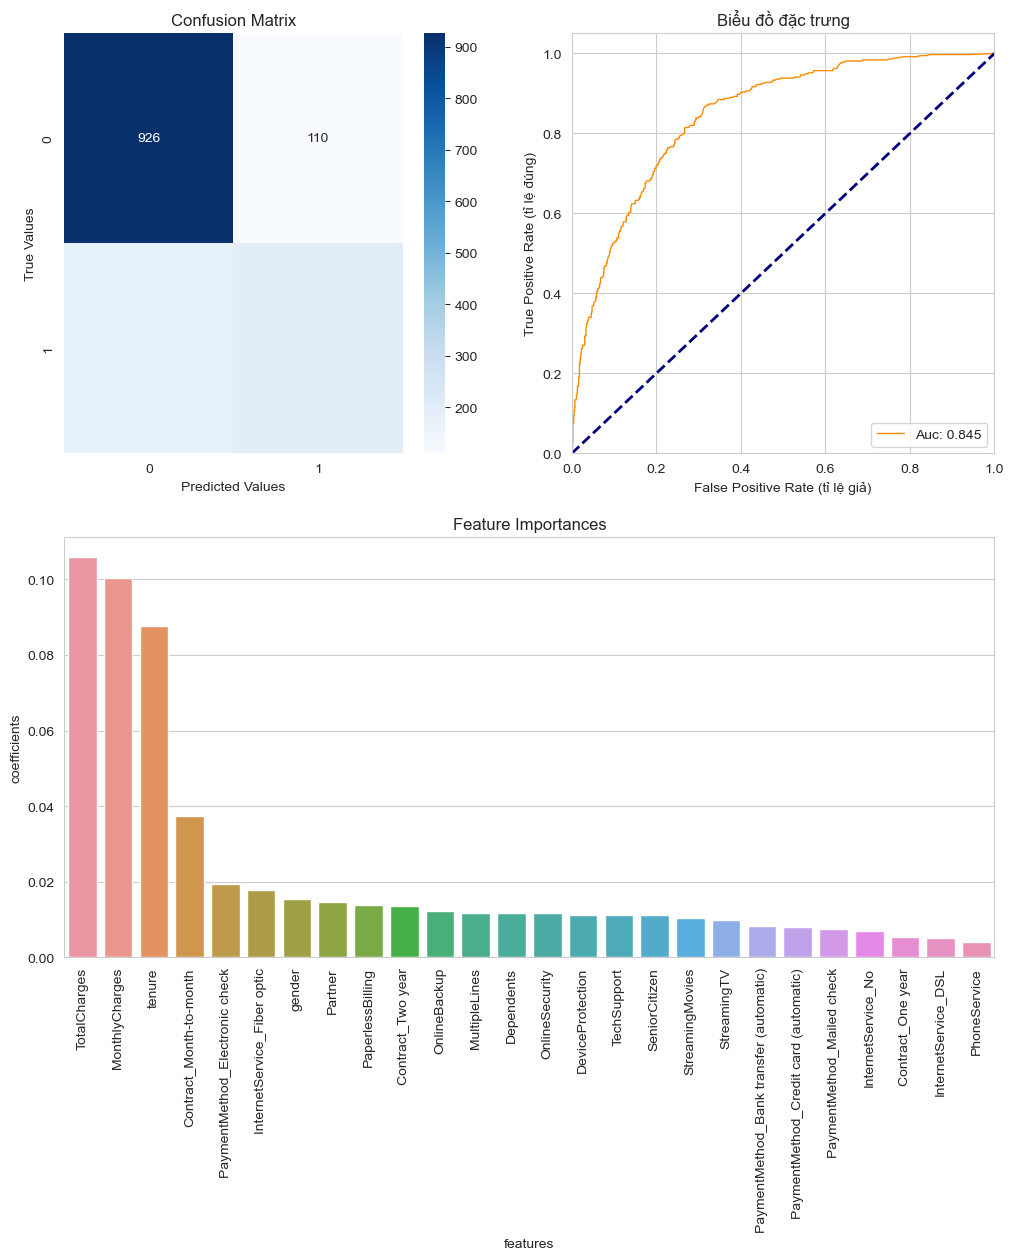

In [34]:
churn_prediction(rf_model, X_train_combined, y_train.values, X_test_combined, y_test.values, cols, cf = 'features')

SVC(kernel='sigmoid', probability=True, random_state=42)

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1036
           1       0.52      0.54      0.53       373

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409

Accuracy Score: 0.7459190915542938
Area under curve: 0.7502057304336124 

Churn rate (based on probabilities): 26.80%
Churn rate (based on predictions): 27.47%


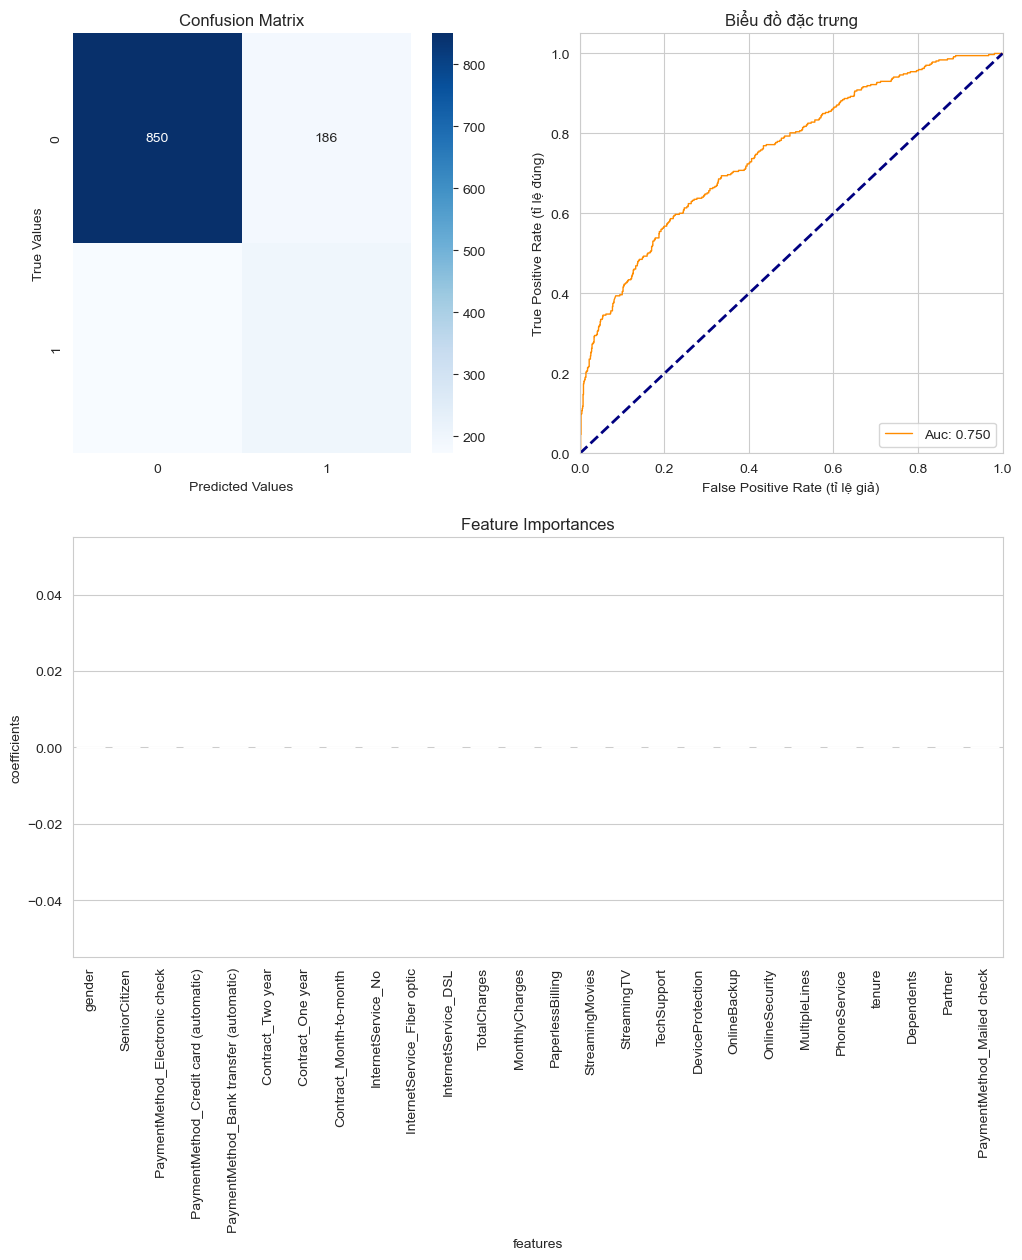

In [35]:
churn_prediction(svm_model, X_train_combined, y_train.values, X_test_combined, y_test.values, cols, cf = 'coefficients')

KNeighborsClassifier()

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.60      0.53      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

Accuracy Score: 0.7828246983676366
Area under curve: 0.7952348173527797 

Churn rate (based on probabilities): 26.78%
Churn rate (based on predictions): 23.07%


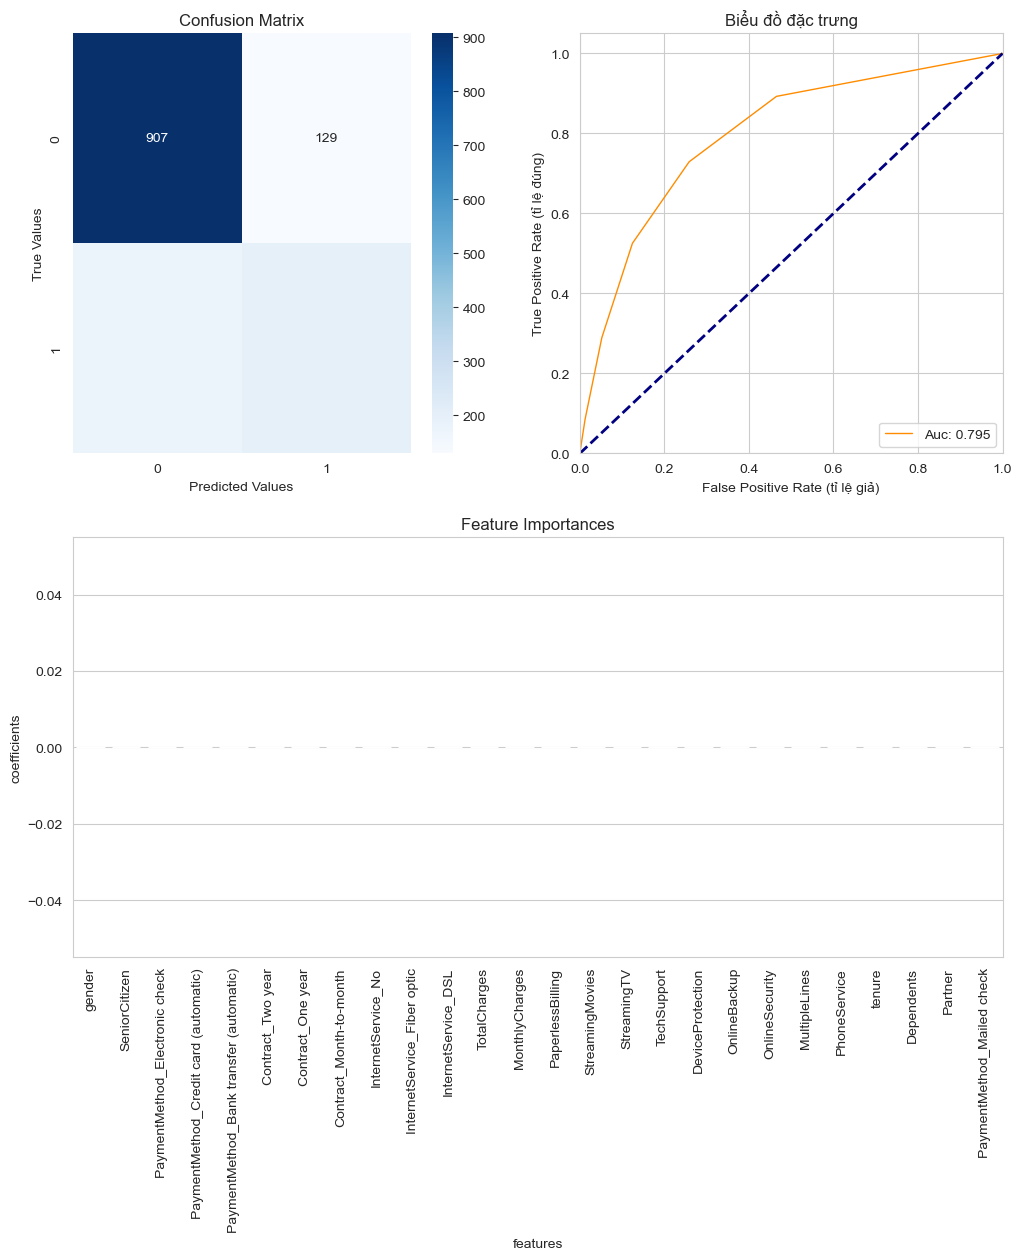

In [36]:
churn_prediction(knn_model, X_train_combined, y_train.values, X_test_combined, y_test.values, cols, cf='features')